## **| 분류 연습 문제**
___
출처 : 핸즈온 머신러닝 Ch03 분류 연습문제 1, 2번

In [1]:
# import data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

In [2]:
X, y = mnist["data"], mnist["target"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### **1. MNIST 데이터셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요.**
___

1. `KNeghtborsClassifier`를 사용하는 것을 추천합니다. 
2. `weights`와 `n_neighbors` 하이퍼 파라미터로 그리드 탐색을 시도하여, 좋은 하이퍼 파라미터 값을 찾아보세요.

In [10]:
# import package
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [11]:
# Try GridSearch to optimize hyperparameter
from sklearn.model_selection import GridSearchCV

params = {'weights': ['uniform','distance'], 'n_neighbors':list(range(3,6))}

grid = GridSearchCV(knn_clf, param_grid = params, cv=3)
grid.fit(X, y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [13]:
# best hyperparameter
grid.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [14]:
# best score
grid.best_score_

0.9703285516208252

In [38]:
# model test
from sklearn.metrics import accuracy_score
pred = grid.predict(X_test)
accuracy_score(pred,y_test)

1.0

### **2. 다음 단계를 따라 인위적으로 훈련 세트를 늘리는 데이터 증식 또는 훈련 세트 확장 기법을 연습해봅시다.**
___

#### **STEP 1. MNIST 이미지를 (왼, 오른, 위, 아래) 어느 방향으로든 한 픽셀 이동시킬 수 있는 함수를 만들어 보세요.**

In [17]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

####  **STEP 2. 앞에서 만든 함수를 이용하여, 훈련 세트에 있는 각 이미지에 대해 네 개의 이동된 복사본(방향마다 한 개씩)을 만들어 훈련 세트에 추가하세요**

In [19]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)
shifted_image_up = shift_image(image, 0, -5)
shifted_image_right = shift_image(image, 5,0)

In [29]:
import matplotlib.pyplot as plt
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = "Greys",
               interpolation="nearest")
    plt.axis("off")

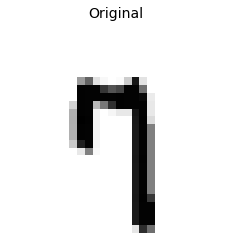

In [30]:
plt.title("Original", fontsize=14)
plot_digit(image)

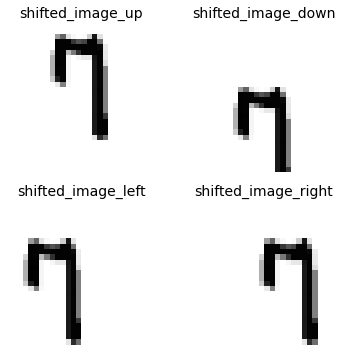

In [32]:
plt.figure(figsize=(6,6))

plt.subplot(221)
plt.title("shifted_image_up", fontsize=14)
plot_digit(shifted_image_up)

plt.subplot(222)
plt.title("shifted_image_down", fontsize=14)
plot_digit(shifted_image_down)

plt.subplot(223)
plt.title("shifted_image_left", fontsize=14)
plot_digit(shifted_image_left)

plt.subplot(224)
plt.title("shifted_image_right", fontsize=14)
plot_digit(shifted_image_right)

치환행렬(permutation matrix): 순서가 부여된 임의의 행렬을 의도된 다른 순서로 뒤섞는 연산 행렬

In [33]:
# 네 개의 이동된 복사본 추가
import numpy as np
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

####  **STEP 3. 위에서 확장한 데이터셋을 이용하여, 1번 문제에서 찾은 최적 모델을 훈련시키고, 테스트 세트에서 정확도를 측정해보세요**

In [34]:
knn_clf = KNeighborsClassifier(**grid.best_params_)

In [36]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [37]:
pred = knn_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9820714285714286